# Shipping Data 

## Context:

An international e-commerce company based wants to discover key insights from their customer database. They want to use some of the most advanced machine learning techniques to study their customers. The company sells electronic products.

## Content:

The dataset used for model building contained 10999 observations of 12 variables.
The data contains the following information:

* ID: ID Number of Customers.
* Warehouse block: The Company have big Warehouse which is divided in to block such as A,B,C,D,F.
* Mode of shipment:The Company Ships the products in multiple way such as Ship, Flight and Road.
* Customer care calls: The number of calls made from enquiry for enquiry of the shipment.
* Customer rating: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).
* Cost of the product: Cost of the Product in US Dollars.
* Prior purchases: The Number of Prior Purchase.
* Product importance: The company has categorized the product in the various parameter such as low, medium, high.
* Gender: Male and Female.
* Discount offered: Discount offered on that specific product.
* Weight in gms: It is the weight in grams.
* Reached on time: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
import xgboost as xgb

## Import Data

In [2]:
df=pd.read_csv('shipping.csv')

In [3]:
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


## Data Exploration

In [4]:
df.shape

(10999, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [6]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,10999.0,NaN,NaN,NaN,5500.0,3175.28214,1.0,2750.5,5500.0,8249.5,10999.0
Warehouse_block,10999,5,F,3666,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mode_of_Shipment,10999,3,Ship,7462,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_care_calls,10999.0,NaN,NaN,NaN,4.054459,1.14149,2.0,3.0,4.0,5.0,7.0
Customer_rating,10999.0,NaN,NaN,NaN,2.990545,1.413603,1.0,2.0,3.0,4.0,5.0
Cost_of_the_Product,10999.0,NaN,NaN,NaN,210.196836,48.063272,96.0,169.0,214.0,251.0,310.0
Prior_purchases,10999.0,NaN,NaN,NaN,3.567597,1.52286,2.0,3.0,3.0,4.0,10.0
Product_importance,10999,3,low,5297,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,10999,2,F,5545,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Discount_offered,10999.0,NaN,NaN,NaN,13.373216,16.205527,1.0,4.0,7.0,10.0,65.0


In [7]:
# Unique values in each columns

In [8]:
for i in df.columns:
    print(i,':',df[i].nunique())

ID : 10999
Warehouse_block : 5
Mode_of_Shipment : 3
Customer_care_calls : 6
Customer_rating : 5
Cost_of_the_Product : 215
Prior_purchases : 8
Product_importance : 3
Gender : 2
Discount_offered : 65
Weight_in_gms : 4034
Reached.on.Time_Y.N : 2


In [9]:
# showing null values in data

In [10]:
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

* It is cleaned data

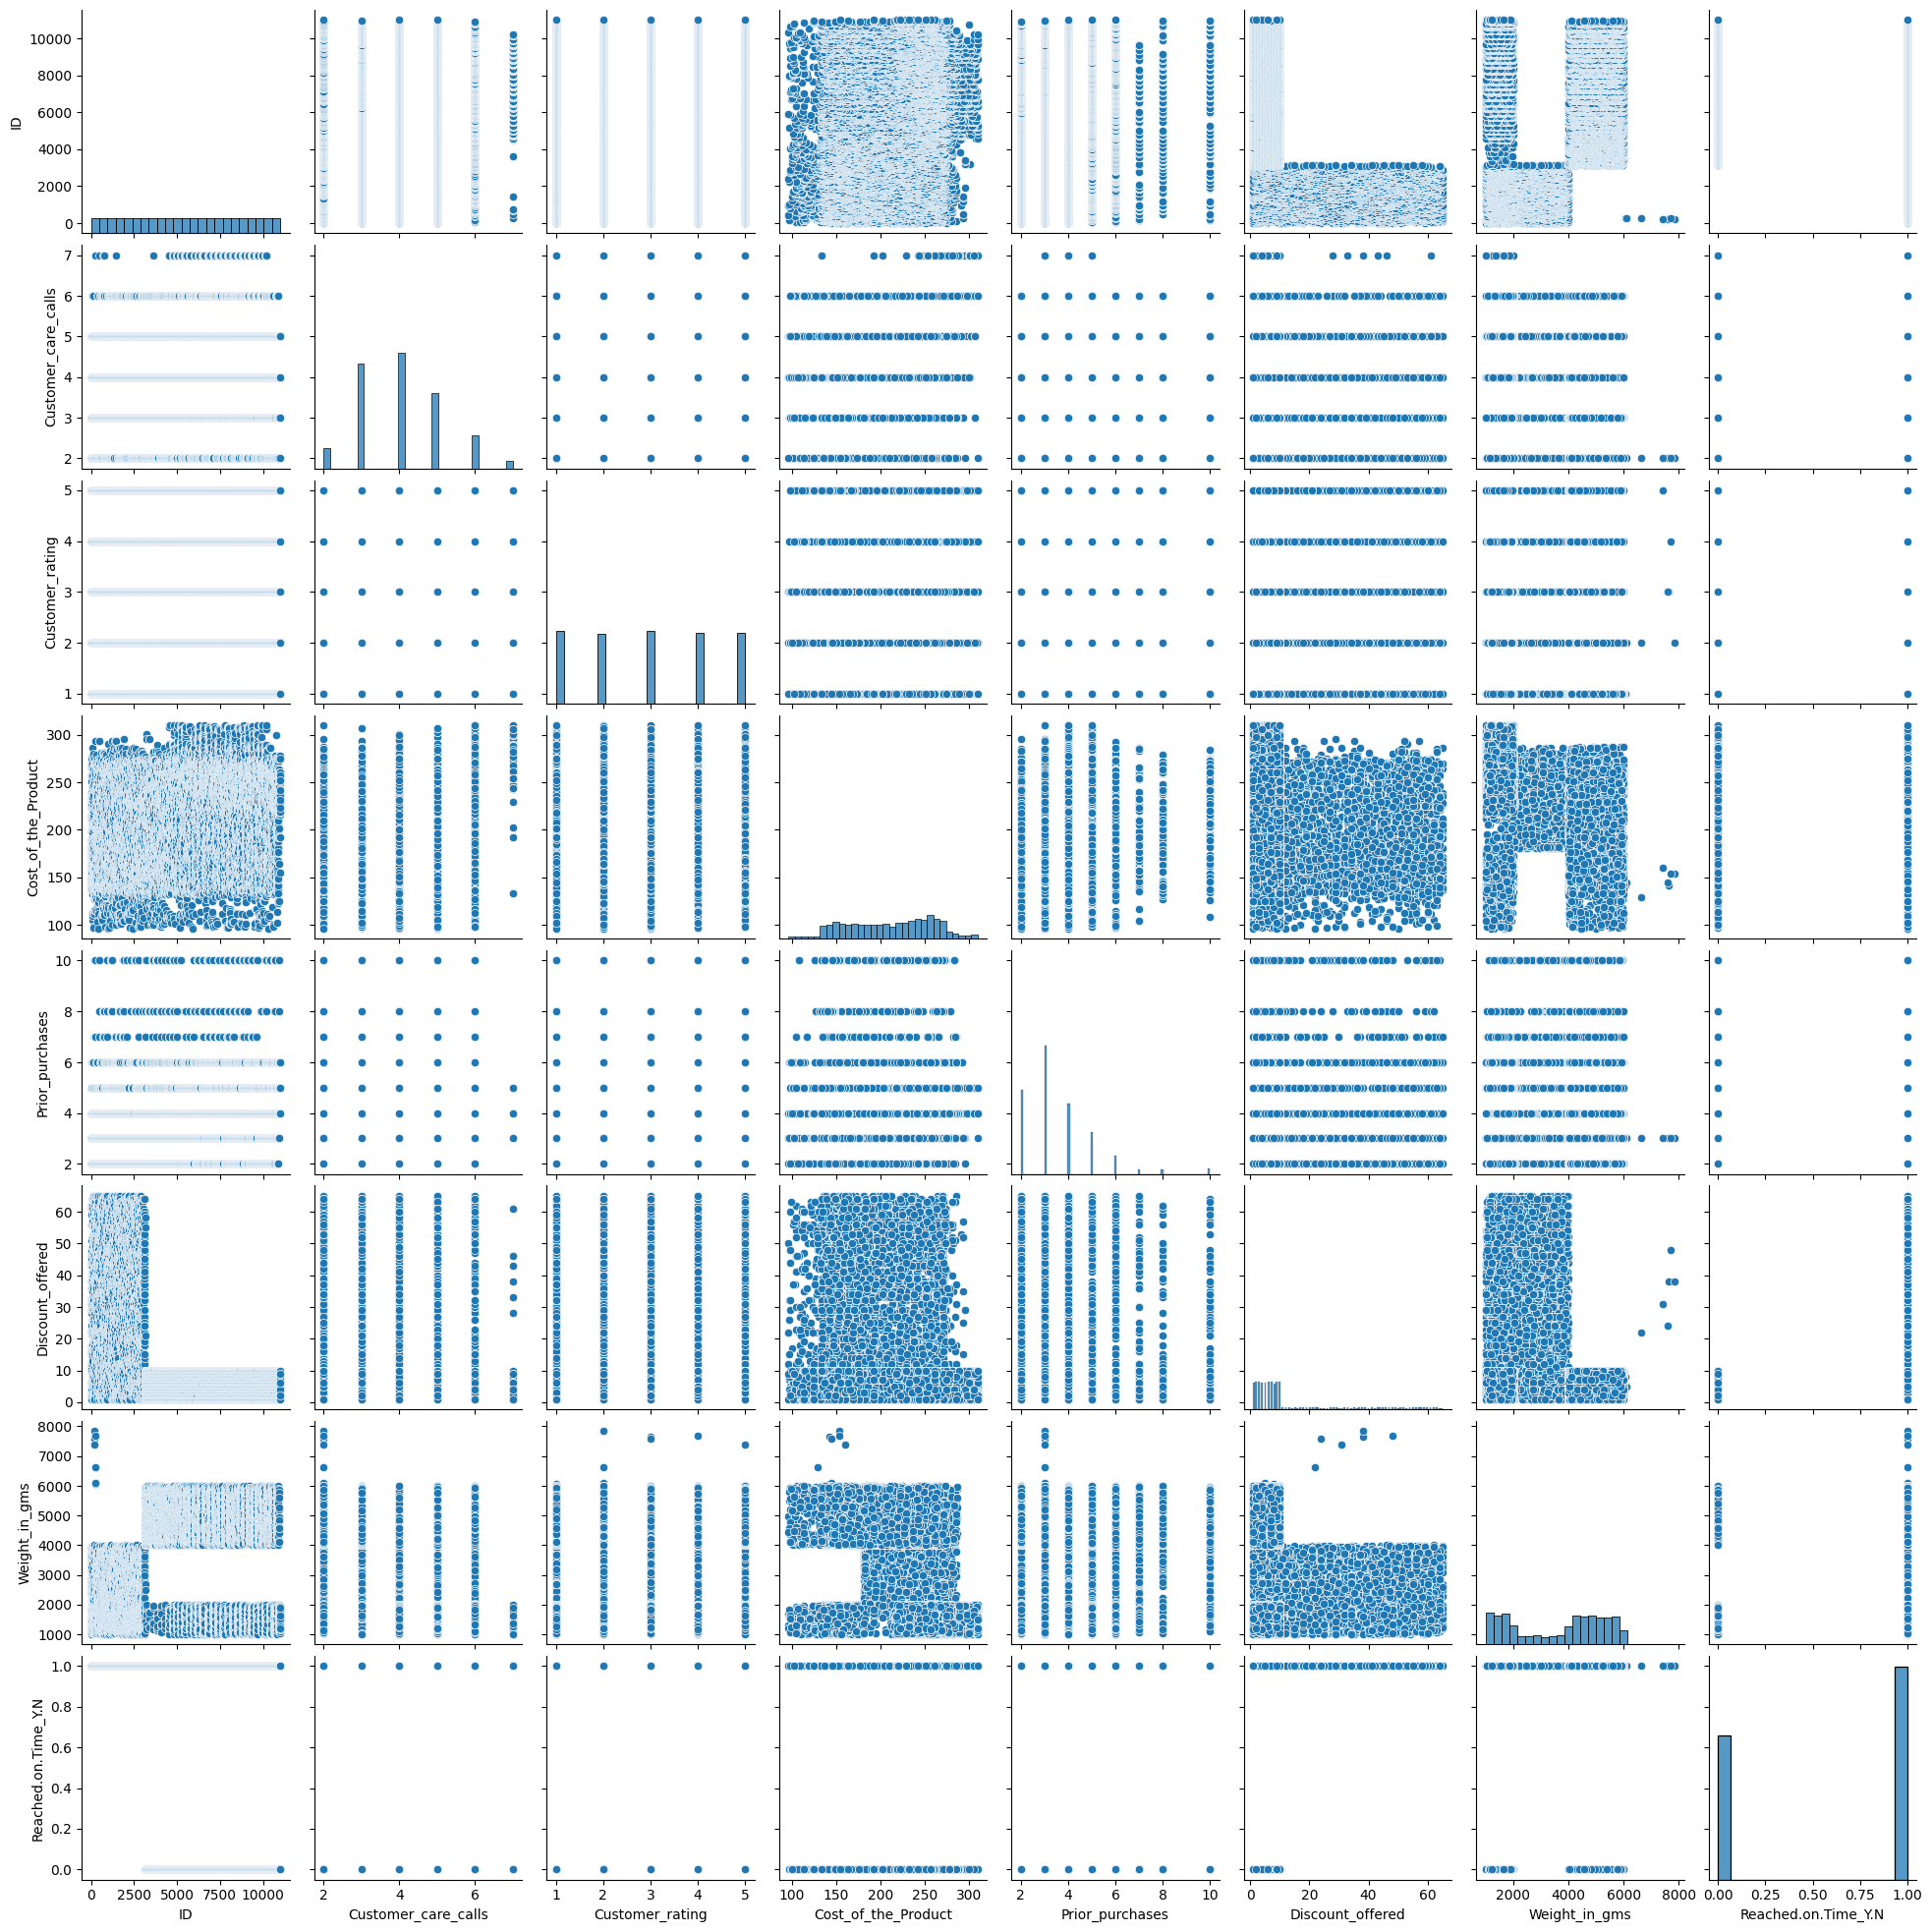

In [11]:
sns.pairplot(df)

In [12]:
corr=df.select_dtypes('number').corr()

<Axes: >

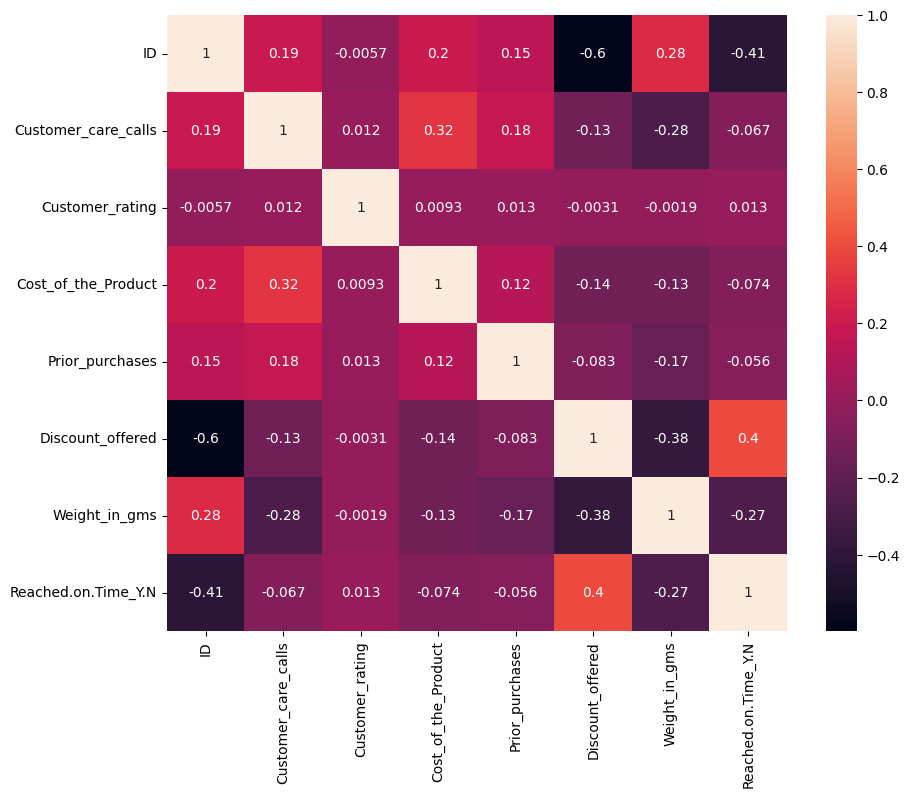

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot= True)

In [14]:
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


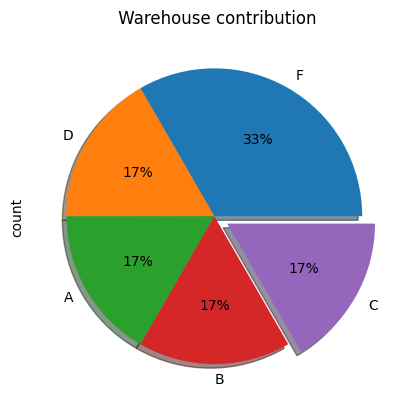

In [15]:
plt.title(' Warehouse contribution')
df['Warehouse_block'].value_counts().plot.pie(explode=(0,0,0,0,0.1),autopct="%.0f%%",shadow=True)
plt.show()

* 33% products are more stored in  block F may be that loaction  maximizes efficiency and accessibility. It helps streamline the movement of goods, reduce picking and packing times, and improve overall warehouse operations
* Other blocks are stores 17% of products

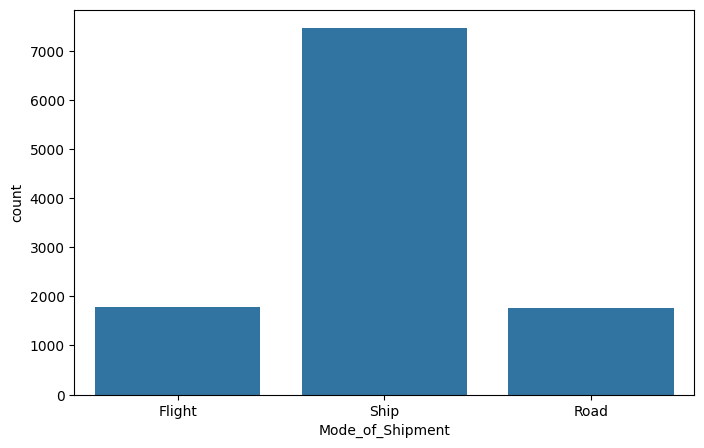

In [16]:
plt.figure(figsize=(8,5))
sns.countplot(df,x='Mode_of_Shipment')
plt.show()

* Efficient product shipment is crucial for customer satisfaction, as delays or mishandling can lead to unhappy customers.
* Shipping by sea is an efficient method for transporting large quantities of goods over long distances. It's commonly used for international trade, moving goods between continents, and transporting bulk cargo.
* Here we can also say that most of the product shipped throgh by sea  may be most products are mean to large quantities of goods over long distances

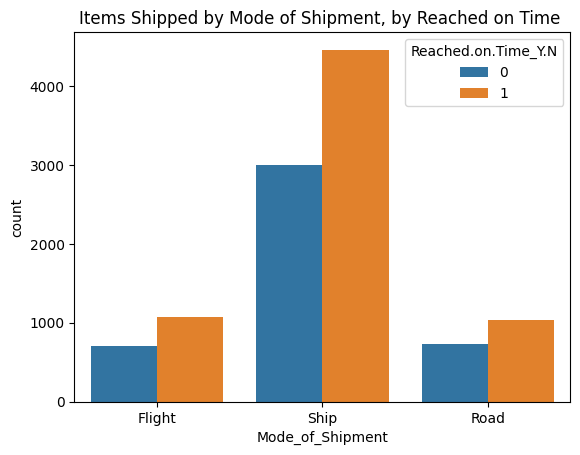

In [17]:
plt.title('Items Shipped by Mode of Shipment, by Reached on Time ')
sns.countplot(x = 'Mode_of_Shipment', hue = 'Reached.on.Time_Y.N', data = df)
plt.show()

* The mode of transportation chosen also affects delivery time. Air freight is faster than shipping by sea for long distances
* Road mode of transportation for short distance also some time  delays delivery .
* Circumstances like weather, transportation issues, or customs delays can sometimes affect delivery times

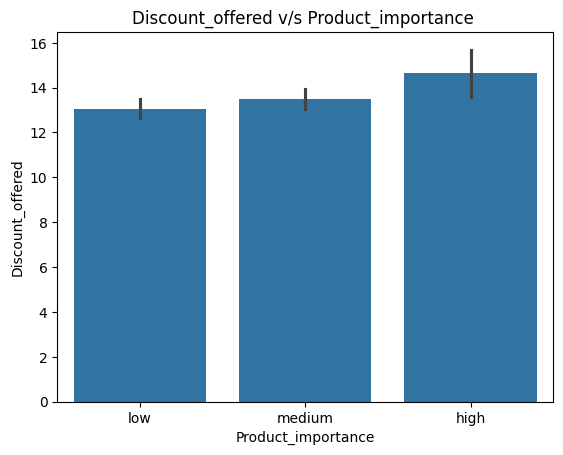

In [18]:
plt.title('Discount_offered v/s Product_importance ')
sns.barplot(x='Product_importance',y='Discount_offered',data=df)
plt.show()

* From the graph we can say high importance products have high discount compaired to low and medium
* Some businesses offer discounts on shipping costs based on the importance of the products being shipped.
* For high-importance or high-value products, they may be willing to absorb a portion of the shipping expenses to provide customers with a better deal or to meet delivery time requirements

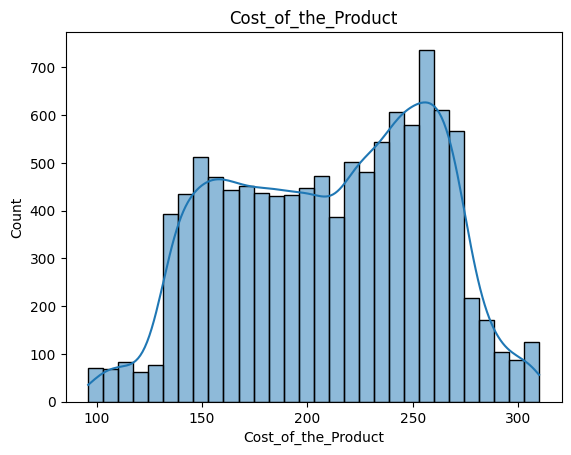

In [19]:
plt.title('Cost_of_the_Product')
sns.histplot(data=df,x='Cost_of_the_Product', kde=True)
plt.show()

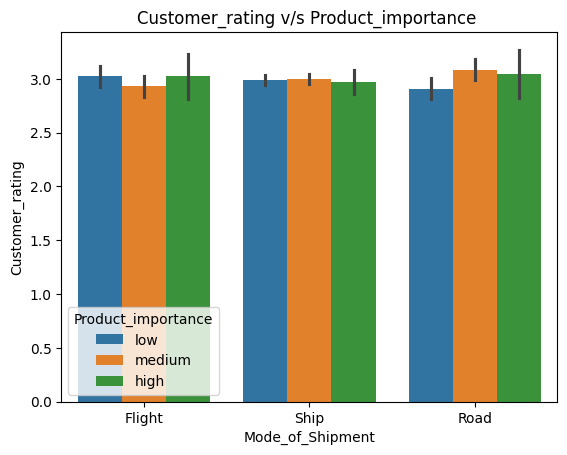

In [20]:
plt.title('Customer_rating v/s Product_importance ')
sns.barplot(data=df,y='Customer_rating',x='Mode_of_Shipment',hue='Product_importance')
plt.show()

* Products with high customer ratings are often considered important for maintaining a positive reputation and customer loyalty.
* Prioritizing Shipment Quality,Shipping Methods and Services,Handling and Packaging these context of shipment decisions helps to meet or exceed customer expectations ,can contribute to positive customer ratings

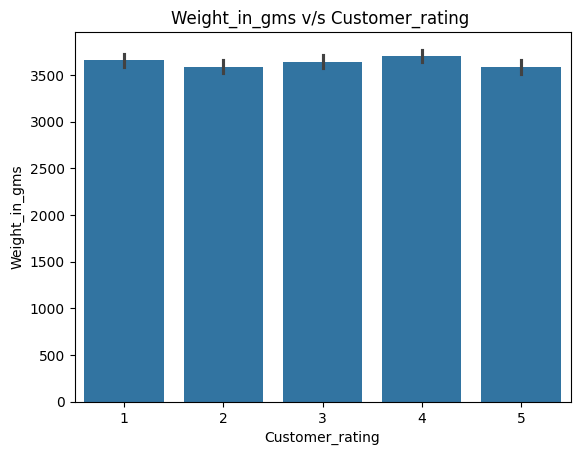

In [21]:
plt.title('Weight_in_gms v/s Customer_rating ')
sns.barplot(x='Customer_rating',y='Weight_in_gms',data=df)
plt.show()

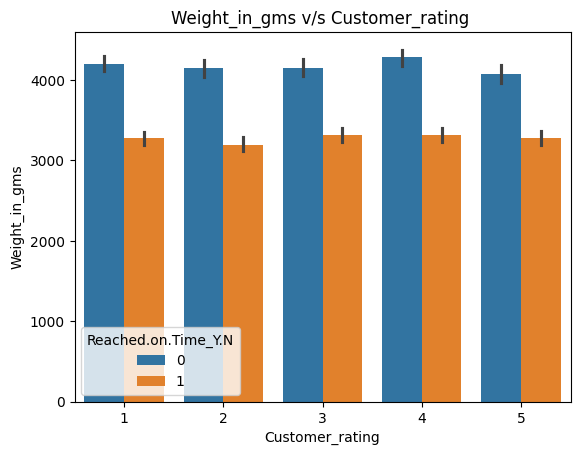

In [22]:
plt.title('Weight_in_gms v/s Customer_rating ')
sns.barplot(x='Customer_rating',y='Weight_in_gms',data=df,hue='Reached.on.Time_Y.N')
plt.show()

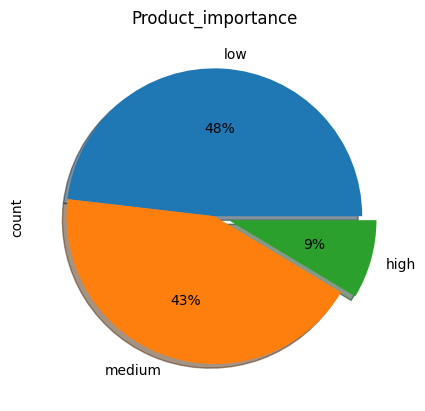

In [23]:
plt.title('Product_importance')
df['Product_importance'].value_counts().plot.pie(explode=(0,0,0.1),autopct="%.0f%%",shadow=True)
plt.show()

* count of high importance products are really less

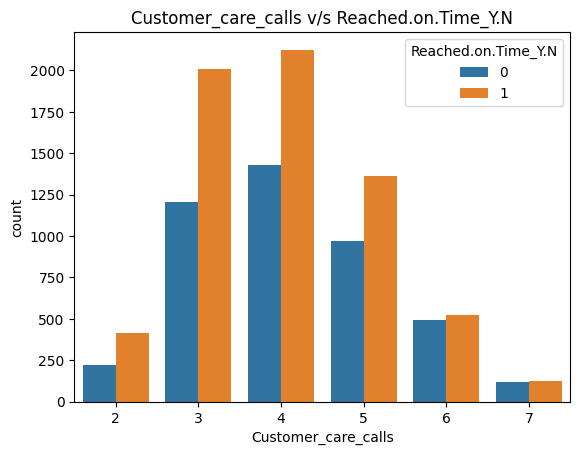

In [24]:
plt.title('Customer_care_calls v/s Reached.on.Time_Y.N')
sns.countplot(x = 'Customer_care_calls', hue = 'Reached.on.Time_Y.N', data = df)
plt.show()

* Customers are more likely to contact customer care when their orders are delayed or do not arrive on time.
* customers are more likely to contact customer care when they have other issues not related to delivery timeliness, such as product quality or billing concerns.

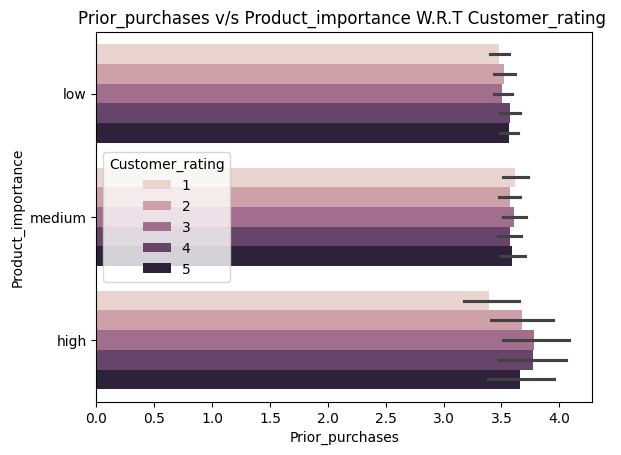

In [25]:
plt.title('Prior_purchases v/s Product_importance W.R.T Customer_rating ')
sns.barplot(x='Prior_purchases',y='Product_importance',hue='Customer_rating',data=df)
plt.show()

* "Product_importance" and "Customer_rating" can vary depending on customer expectations and the quality of the product.

<Axes: title={'center': 'Customer_rating'}, ylabel='count'>

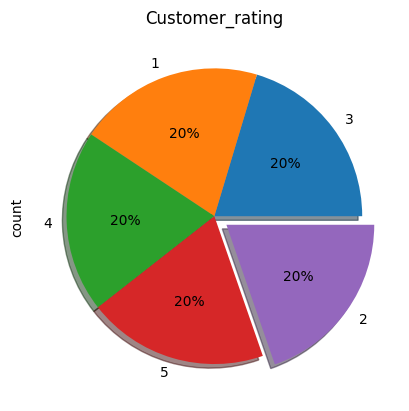

In [26]:
plt.title('Customer_rating')
df['Customer_rating'].value_counts().plot.pie(explode=(0,0,0,0,0.1),autopct="%.0f%%",shadow=True)

* Count of each rating is 20%

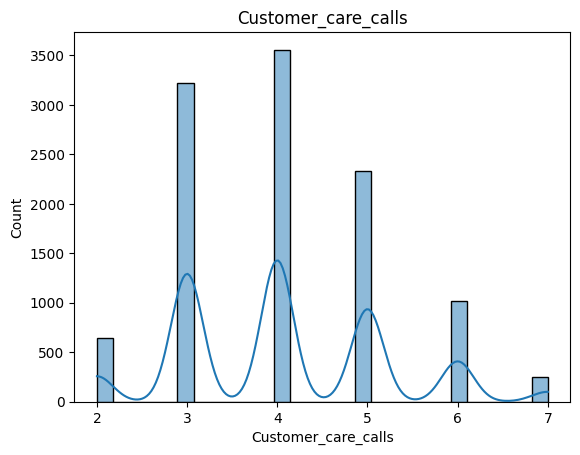

In [27]:
plt.title('Customer_care_calls')
sns.histplot(data=df,x='Customer_care_calls', kde=True)
plt.show()

* It measures the number of calls or inquiries made by customers to the customer care 
* These calls can be related to various issues, including order status, delivery concerns, product quality, or any other inquiries or complaints.

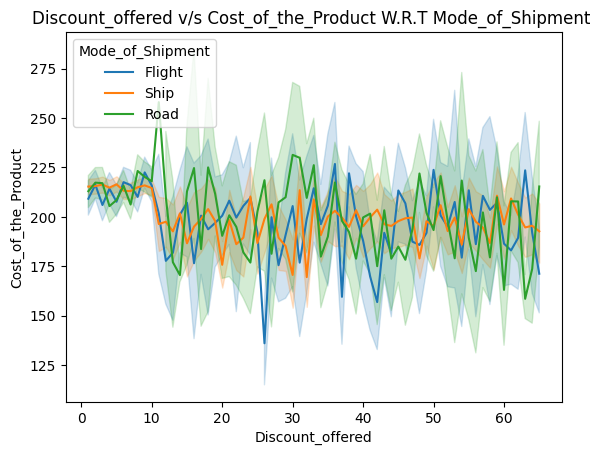

In [28]:
plt.title('Discount_offered v/s Cost_of_the_Product W.R.T Mode_of_Shipment ')
sns.lineplot(x='Discount_offered',y='Cost_of_the_Product',hue='Mode_of_Shipment',data=df)
plt.show()

* Some shipment methods may have higher associated costs due to speed, insurance, or handling requirements. Businesses may pass these additional costs on to customers, which can affect the product's overall price
* Customers may be willing to pay more for a product with faster shipping if the discount offered makes it affordable

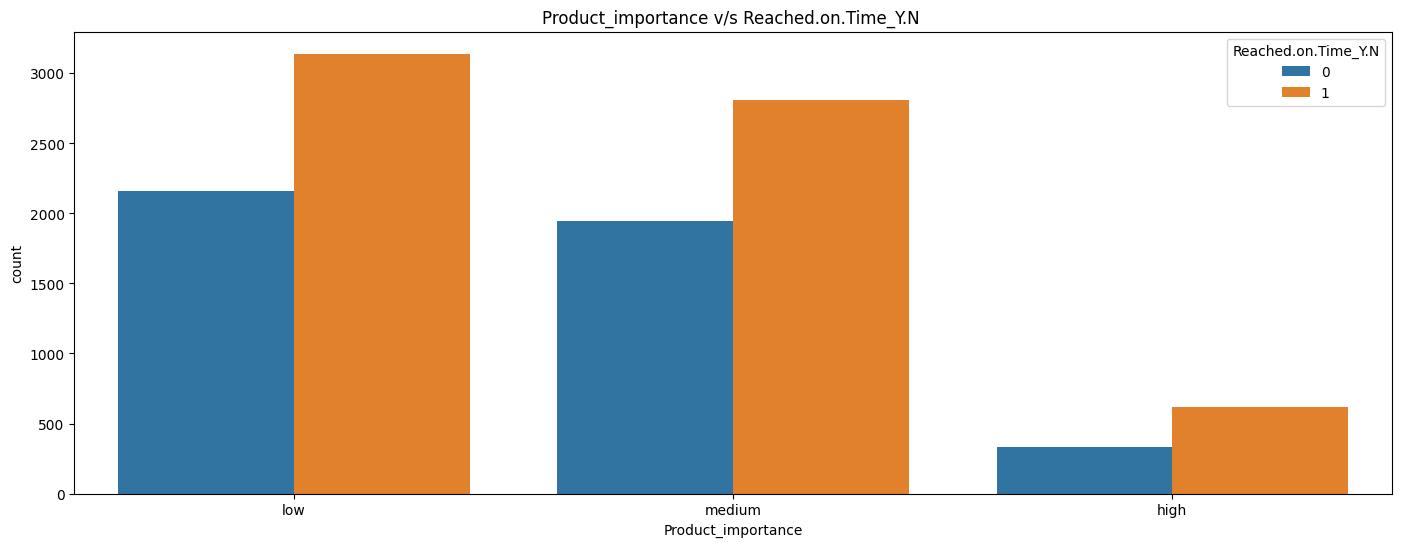

In [29]:
plt.figure(figsize = (17, 6))
plt.title('Product_importance v/s Reached.on.Time_Y.N ')
sns.countplot(x = 'Product_importance', hue = 'Reached.on.Time_Y.N', data = df)
plt.show()

* Here count of not deliverd on time (1) more for all product .May be the importance of the product may not significantly affect its on-time delivery.
* company's prioritization of different products, and its commitment to ensuring that highly important products reach customers on time.

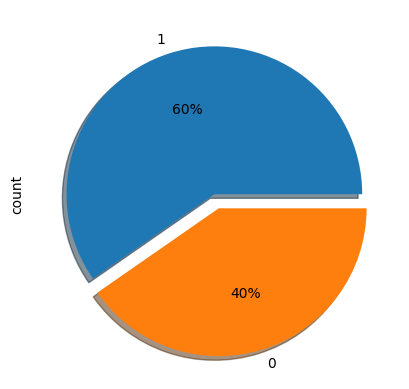

In [30]:
df['Reached.on.Time_Y.N'].value_counts().plot.pie(explode=(0,0.1),autopct="%.0f%%",shadow=True)
plt.show()

* Imbalenced data

In [31]:
df.groupby(['Product_importance'])['Mode_of_Shipment'].count().reset_index()

,Product_importance,Mode_of_Shipment
0,high,948
1,low,5297
2,medium,4754


In [32]:
df.groupby(['Product_importance'])[['Discount_offered','Cost_of_the_Product','Prior_purchases']].value_counts().reset_index()

,Product_importance,Discount_offered,Cost_of_the_Product,Prior_purchases,count
0,high,7,161,3,3
1,high,1,158,3,2
2,high,1,176,3,2
3,high,1,186,3,2
4,high,1,205,3,2
...,...,...,...,...,...
8937,medium,65,201,3,1
8938,medium,65,212,2,1
8939,medium,65,226,3,1
8940,medium,65,228,2,1


In [33]:
df.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [34]:
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


# Lable Encoding

In [35]:
df1=df.copy()

In [36]:
df1=pd.get_dummies(df1,columns=['Mode_of_Shipment','Product_importance','Gender'],drop_first=True)

In [37]:
df1

,ID,Warehouse_block,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_low,Product_importance_medium,Gender_M
0,1,D,4,2,177,3,44,1233,1,False,False,True,False,False
1,2,F,4,5,216,2,59,3088,1,False,False,True,False,True
2,3,A,2,2,183,4,48,3374,1,False,False,True,False,True
3,4,B,3,3,176,4,10,1177,1,False,False,False,True,True
4,5,C,2,2,184,3,46,2484,1,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,4,1,252,5,1,1538,1,False,True,False,True,False
10995,10996,B,4,1,232,5,6,1247,0,False,True,False,True,False
10996,10997,C,5,4,242,5,4,1155,0,False,True,True,False,False
10997,10998,F,5,2,223,6,2,1210,0,False,True,False,True,True


In [38]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df1['Warehouse_block']=le.fit_transform(df1['Warehouse_block'])

In [39]:
df1

,ID,Warehouse_block,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_low,Product_importance_medium,Gender_M
0,1,3,4,2,177,3,44,1233,1,False,False,True,False,False
1,2,4,4,5,216,2,59,3088,1,False,False,True,False,True
2,3,0,2,2,183,4,48,3374,1,False,False,True,False,True
3,4,1,3,3,176,4,10,1177,1,False,False,False,True,True
4,5,2,2,2,184,3,46,2484,1,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,0,4,1,252,5,1,1538,1,False,True,False,True,False
10995,10996,1,4,1,232,5,6,1247,0,False,True,False,True,False
10996,10997,2,5,4,242,5,4,1155,0,False,True,True,False,False
10997,10998,4,5,2,223,6,2,1210,0,False,True,False,True,True


In [40]:
x=df1.drop(['Reached.on.Time_Y.N','ID'],axis=1)

In [41]:
x

,Warehouse_block,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_low,Product_importance_medium,Gender_M
0,3,4,2,177,3,44,1233,False,False,True,False,False
1,4,4,5,216,2,59,3088,False,False,True,False,True
2,0,2,2,183,4,48,3374,False,False,True,False,True
3,1,3,3,176,4,10,1177,False,False,False,True,True
4,2,2,2,184,3,46,2484,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,0,4,1,252,5,1,1538,False,True,False,True,False
10995,1,4,1,232,5,6,1247,False,True,False,True,False
10996,2,5,4,242,5,4,1155,False,True,True,False,False
10997,4,5,2,223,6,2,1210,False,True,False,True,True


In [42]:
y=df1['Reached.on.Time_Y.N']
y

0        1
1        1
2        1
3        1
4        1
        ..
10994    1
10995    0
10996    0
10997    0
10998    0
Name: Reached.on.Time_Y.N, Length: 10999, dtype: int64

In [43]:
# splitting dataset for  train test 

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [45]:
x_train

,Warehouse_block,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_low,Product_importance_medium,Gender_M
9957,1,7,4,282,4,6,1800,False,True,True,False,True
1507,4,4,1,135,2,64,1471,False,False,False,True,False
6382,2,4,1,214,2,10,4447,False,True,True,False,False
1559,4,3,1,171,2,1,1629,False,True,True,False,True
5703,1,5,5,248,2,4,5587,False,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
5734,2,3,5,275,2,7,4619,True,False,True,False,False
5191,4,5,5,187,4,9,5326,True,False,False,True,False
5390,0,4,2,137,2,2,5804,False,True,False,True,False
860,0,5,3,144,6,35,1009,False,True,False,True,False


In [46]:
y_train

9957    0
1507    1
6382    0
1559    1
5703    0
       ..
5734    0
5191    0
5390    1
860     1
7270    0
Name: Reached.on.Time_Y.N, Length: 7699, dtype: int64

In [47]:
# scaling

In [48]:
scaler=StandardScaler()
x_train1=scaler.fit_transform(x_train)
x_train=pd.DataFrame(x_train1,columns=x.columns)
x_train

,Warehouse_block,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_low,Product_importance_medium,Gender_M
0,-0.894636,2.546375,0.709617,1.476283,0.268305,-0.453434,-1.113175,-0.435204,0.689543,1.035841,-0.870496,0.99961
1,1.117773,-0.058764,-1.416196,-1.564598,-1.039087,3.128587,-1.314043,-0.435204,-1.450236,-0.965399,1.148771,-1.00039
2,-0.223833,-0.058764,-1.416196,0.069617,-1.039087,-0.206398,0.502928,-0.435204,0.689543,1.035841,-0.870496,-1.00039
3,1.117773,-0.927144,-1.416196,-0.819893,-1.039087,-0.762229,-1.217578,-0.435204,0.689543,1.035841,-0.870496,0.99961
4,-0.894636,0.809616,1.418221,0.772950,-1.039087,-0.576952,1.198945,-0.435204,0.689543,1.035841,-0.870496,0.99961
...,...,...,...,...,...,...,...,...,...,...,...,...
7694,-0.223833,-0.927144,1.418221,1.331480,-1.039087,-0.391675,0.607941,2.297775,-1.450236,1.035841,-0.870496,-1.00039
7695,1.117773,0.809616,1.418221,-0.488912,0.268305,-0.268157,1.039594,2.297775,-1.450236,-0.965399,1.148771,-1.00039
7696,-1.565439,-0.058764,-0.707592,-1.523226,-1.039087,-0.700470,1.331433,-0.435204,0.689543,-0.965399,1.148771,-1.00039
7697,-1.565439,0.809616,0.001012,-1.378422,1.575697,1.337577,-1.596113,-0.435204,0.689543,-0.965399,1.148771,-1.00039


In [49]:
x_test1=scaler.transform(x_test)
x_test=pd.DataFrame(x_test1,columns=x.columns)
x_test

,Warehouse_block,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_low,Product_importance_medium,Gender_M
0,1.117773,-0.058764,1.418221,0.110990,-0.385391,0.781746,-0.958708,-0.435204,0.689543,-0.965399,-0.870496,0.99961
1,-1.565439,-0.927144,-1.416196,0.193735,-0.385391,-0.453434,1.189787,2.297775,-1.450236,1.035841,-0.870496,-1.00039
2,1.117773,-0.927144,-0.707592,0.090303,0.268305,-0.638711,0.255659,-0.435204,-1.450236,1.035841,-0.870496,-1.00039
3,0.446970,0.809616,-1.416196,-1.047442,0.922001,-0.762229,0.640300,-0.435204,-1.450236,1.035841,-0.870496,-1.00039
4,-0.894636,0.809616,0.709617,0.379911,-1.039087,1.893407,-0.735250,-0.435204,0.689543,-0.965399,1.148771,-1.00039
...,...,...,...,...,...,...,...,...,...,...,...,...
3295,-1.565439,-0.927144,-1.416196,-0.675089,0.268305,-0.268157,1.284421,-0.435204,0.689543,-0.965399,1.148771,0.99961
3296,1.117773,-0.927144,1.418221,1.228048,-0.385391,-0.391675,0.510254,-0.435204,0.689543,-0.965399,-0.870496,-1.00039
3297,-0.223833,-0.927144,0.001012,1.103931,-1.039087,-0.453434,0.292291,-0.435204,0.689543,1.035841,-0.870496,0.99961
3298,-0.223833,-0.058764,-0.707592,1.290107,0.268305,0.781746,-0.244375,-0.435204,0.689543,1.035841,-0.870496,-1.00039


# Model Creating
   ========================

## LogisticRegression

In [50]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

In [51]:
y_pred_tr=LR.predict(x_train)
y_pred_tr

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

In [52]:
accuracy=accuracy_score(y_pred_tr,y_train)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6426808676451488


In [53]:
y_pred=LR.predict(x_test)


In [54]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.6351515151515151

In [55]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [56]:
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.57      0.55      1312
           1       0.70      0.68      0.69      1988

    accuracy                           0.64      3300
   macro avg       0.62      0.62      0.62      3300
weighted avg       0.64      0.64      0.64      3300



* Precision for class 0 is 0.54, meaning 54% of predictions for class 0 were correct.

* Recall for class 0 is 0.58, indicating that 58 % of actual class 0 instances were correctly identified.

* The F1-score balances precision and recall, providing an overall measure of model performance.

* The accuracy of the model is 64%

In [57]:
# Create a logistic regression model with L1 regularization (Lasso)
# lasso_classifier = LogisticRegression(penalty='l1', C=1.0, solver='liblinear')


In [58]:
# lasso_classifier.fit(x_train, y_train)


In [59]:
# y_pred = lasso_classifier.predict(x_test)


In [60]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6351515151515151


### Hyper parameter tuning
* 1.Randomsearchcv
* 2.Gridsearchcv



### Key hyperparameters to tune:

* penalty: Type of regularization ('l1', 'l2', 'elasticnet', 'none').
* C: Inverse of regularization strength. Smaller values indicate stronger regularization.
* solver: Optimization algorithm ('liblinear', 'saga', 'lbfgs', 'newton-cg').
* max_iter: Maximum number of iterations for convergence.

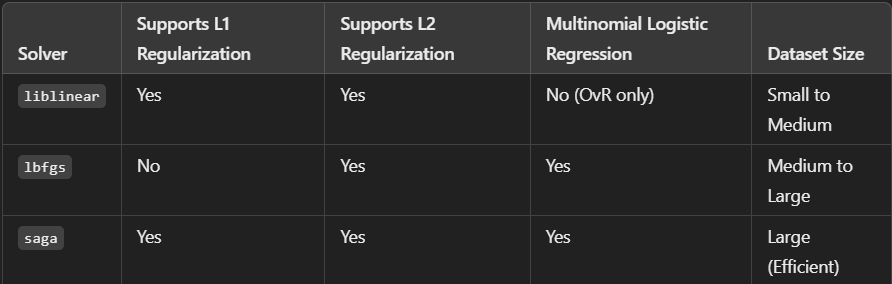

In [61]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [62]:
# Hyperparameter space
param_distributions = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 500]
}


In [63]:

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=LR,
    param_distributions=param_distributions,
    n_iter=50,  # Number of random combinations to try
    scoring='accuracy',  # Metric to optimize
    cv=5,  # Number of cross-validation folds
    random_state=42,
    verbose=1
)



In [64]:
# Fit the model
random_search.fit(x_train, y_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=50,
                   param_distributions={'C': [0.01, 0.1, 1, 10, 100],
                                        'max_iter': [100, 200, 500],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear', 'saga']},
                   random_state=42, scoring='accuracy', verbose=1)

In [65]:

# Best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)


Best Parameters: {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 200, 'C': 0.01}
Best Accuracy: 0.6451505025189237


In [66]:
# GridSearchCV


In [67]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1],
    'max_iter': [100, 200, 300],
    'penalty': ['l2'],
    'solver': ['liblinear']
}

grid_search = GridSearchCV(
    estimator=LR,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1
)


In [68]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1],
                         'max_iter': [100, 200, 300], 'penalty': ['l2'],
                         'solver': ['liblinear']},
             scoring='accuracy', verbose=1)

In [69]:
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Best Parameters: {'C': 0.001, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best Accuracy: 0.6500874239470731


In [70]:
final_model = LogisticRegression(
    C=0.001,
    max_iter=100,
    penalty='l2',
    solver='liblinear'
)
final_model.fit(x_train, y_train)

LogisticRegression(C=0.001, solver='liblinear')

In [71]:
# Predictions
y_pred = final_model.predict(x_test)


In [72]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, ConfusionMatrixDisplay

In [73]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 808,  504],
       [ 638, 1350]], dtype=int64)

In [74]:
final_model.classes_

array([0, 1], dtype=int64)

In [75]:
# # Display the Confusion Matrix
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=final_model.classes_)
# disp.plot(cmap=plt.cm.Blues)
# plt.title("Confusion Matrix")
# plt.show()

In [76]:
# Predict Probabilities
y_pred_proba = final_model.predict_proba(x_test)[:, 1]
y_pred_proba


array([0.74537492, 0.43976769, 0.4831952 , ..., 0.51669044, 0.64942203,
       0.50985413])

In [77]:
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
print(fpr)
print(tpr)
print(thresholds)

[0.         0.         0.         ... 0.99847561 1.         1.        ]
[0.00000000e+00 5.03018109e-04 3.29979879e-01 ... 9.98490946e-01
 9.98490946e-01 1.00000000e+00]
[       inf 0.9314287  0.68549764 ... 0.3378188  0.33166938 0.29263501]


In [78]:
roc_auc = auc(fpr, tpr)
roc_auc

0.7256158904647396

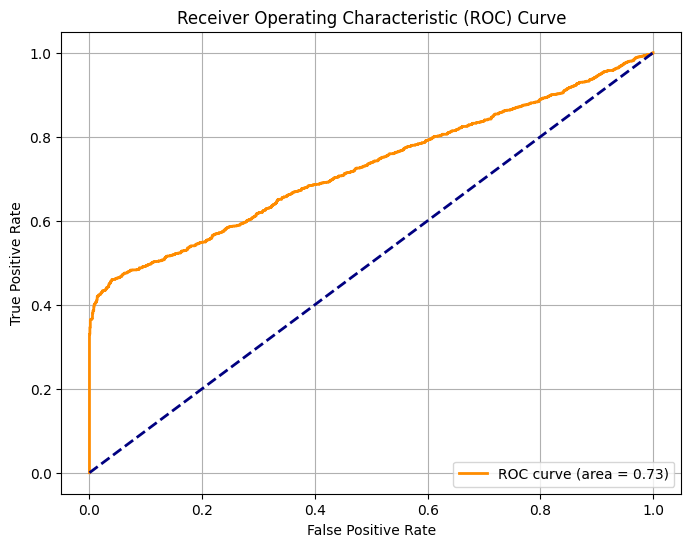

ROC-AUC Score: 0.73


In [79]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

print(f"ROC-AUC Score: {roc_auc:.2f}")


* The ROC AUC score represents the probability that the model will correctly rank a randomly chosen positive instance higher than a randomly chosen negative instance.
* A score of 0.7256 means that the model has a 72.56% chance of correctly ranking positive cases over negative cases.

# Knearest Nearest Neighbor

In [118]:
from sklearn.neighbors import KNeighborsClassifier


In [119]:
# KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)  # Choose k=3
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [120]:
y_knn=knn.predict(x_test)

In [122]:
accuracy=accuracy_score(y_knn,y_test)
accuracy

0.6409090909090909

In [123]:
from sklearn.model_selection import cross_val_score
mean_scores = []
k_values=range(1,11)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Perform cross-validation and calculate the mean score (accuracy)
    scores = cross_val_score(knn, x_train, y_train, cv=5, scoring='accuracy')  # 5-fold cross-validation
    mean_scores.append(np.mean(scores))



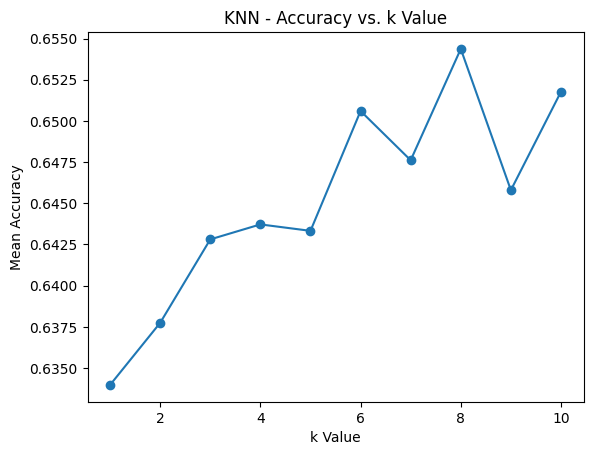

In [124]:
import matplotlib.pyplot as plt

plt.plot(k_values, mean_scores, marker='o')
plt.title('KNN - Accuracy vs. k Value')
plt.xlabel('k Value')
plt.ylabel('Mean Accuracy')
plt.show()


In [126]:
# Find the best k (the one with the highest mean score)
best_k = k_values[np.argmax(mean_scores)]
print(best_k)
best_score = np.max(mean_scores)
print(best_score)

8
0.6543699315629141


In [130]:
# KNN Classifier
knn = KNeighborsClassifier(n_neighbors=8)  # Choose k=3
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [132]:
y_knn2=knn.predict(x_test)

In [133]:
accuracy=accuracy_score(y_knn2,y_test)
accuracy

0.6487878787878788